In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Autapse

0.1
[1.38404477 1.3063021  1.70801556 1.21894316 1.30502708 1.21524109
 1.74113111 1.37051568 1.23616126 1.69456631 1.39469545 1.26780484
 1.56074724 1.3026991  1.29781278 1.30159604 1.27412979 1.73509254
 1.02381645 1.31125415 0.96449765 1.65162195 1.22248854 1.15537436
 1.40450712 1.31510267 1.47855904]
n 27
0.11
[1.43922631 1.28220928 1.43647291 1.22350372 1.27252139 1.44603858
 1.23411578 1.45432232 1.53130146 1.28466033 1.28000948 1.2372667
 1.34605152 1.12206406 1.20006806 1.65121545 1.57878581 1.37928857
 1.18904024 1.13924305 1.31354647 1.3683409  1.15618818 1.41559467
 1.47840247 1.24641315 1.40804331 1.06355917 1.26531016 1.11520926
 1.10702265 1.32949081 1.38080989]
n 33
0.12
[0.91600936 1.73855274 1.20607099 1.19007619 1.03614847 1.43728336
 1.64057707 1.28358166 1.07624838 1.20827219 1.77571625 1.34726328
 1.19127268 1.17191406 1.23707403 1.30683482 1.17697296 0.85334942
 1.07602594 1.28343991 1.22067429 1.28744367 1.55735129 1.25552284
 1.24340447 1.08936432 1.22099128 1.

<IPython.core.display.Javascript object>


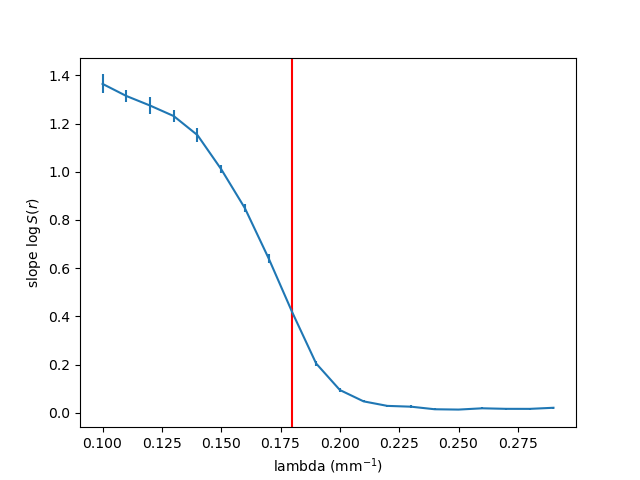

Text(0.5, 0, 'lambda (mm$^{-1}$)')

In [3]:
df = pd.read_csv('parametersRuns-autapse.csv')

lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
for lamd in lambdas:
    print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    print(alphas)
    n = len(alphas)
    print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))
plt.figure()
plt.errorbar(lambdas, alphaMean, alphaSe)
plt.axvline(x = 0.18, color='r')
plt.ylabel('slope $\log S(r)$')
plt.xlabel('lambda (mm$^{-1}$)')

In [4]:
lambdas = np.unique(df['lambdas'].values)
lambdas

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29]


<IPython.core.display.Javascript object>


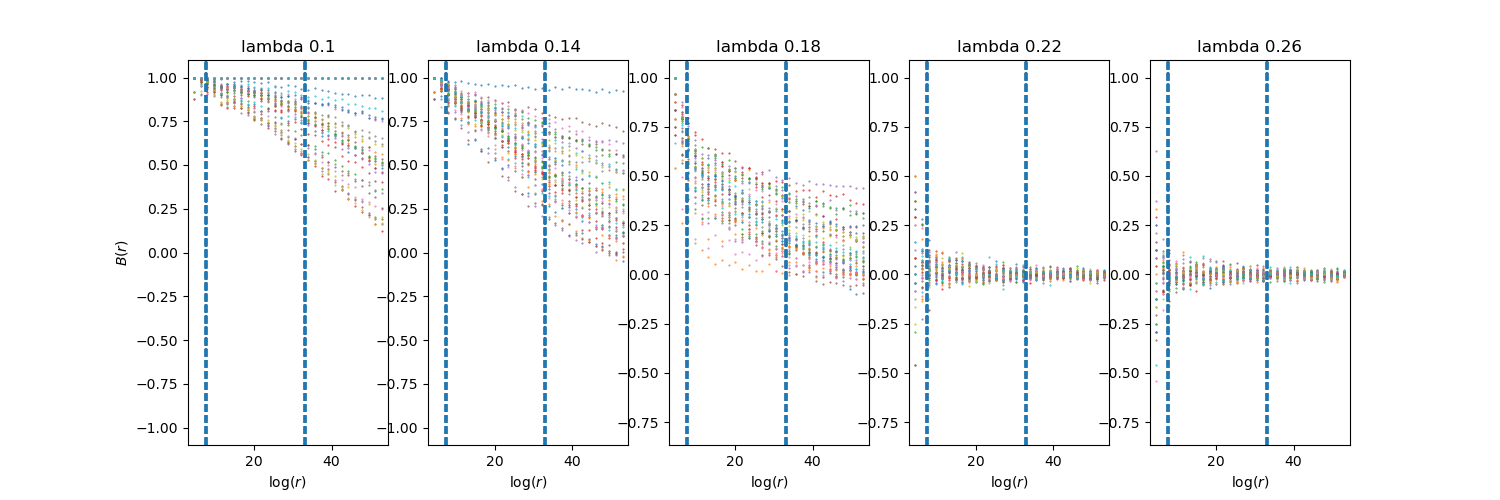

0 0.1
4 0.1399999999999999
8 0.1799999999999999
12 0.2199999999999999
16 0.2599999999999999


<IPython.core.display.Javascript object>


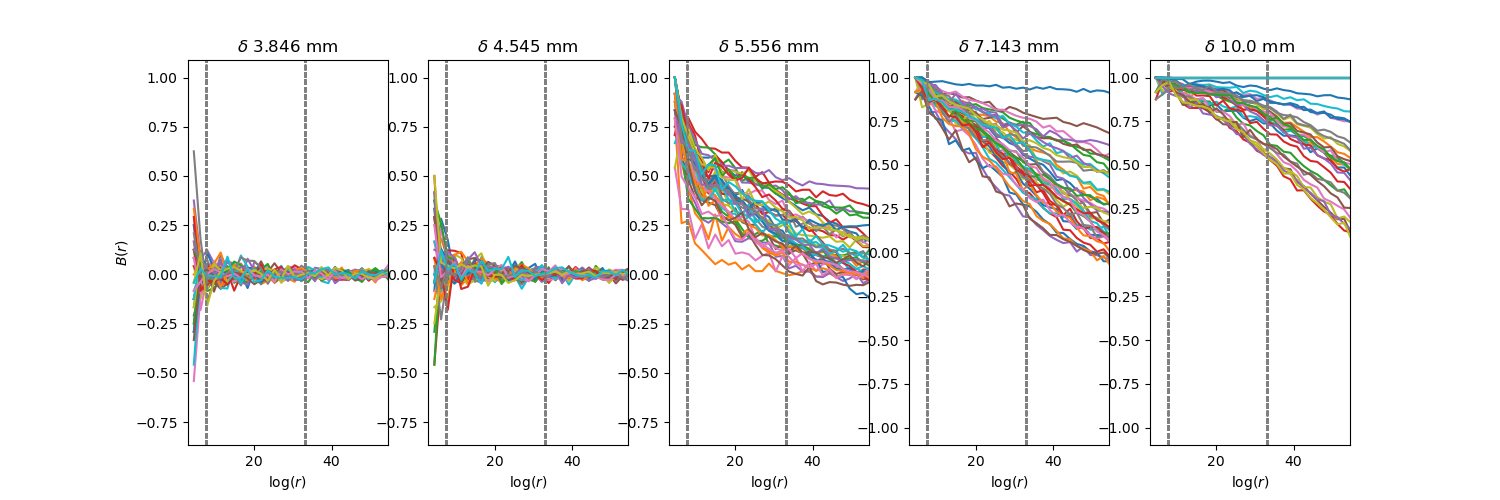

16 0.2599999999999999
12 0.2199999999999999
8 0.1799999999999999
4 0.1399999999999999
0 0.1


In [5]:
df = pd.read_csv('parametersRuns-autapse.csv')
dfBd = pd.read_csv('BdRuns-autapse.csv')

lambdas = np.unique(df['lambdas'].values)
print(lambdas)

f,axs = plt.subplots(1,5,figsize=(15,5))

BdName = list(dfBd.columns)[1:]

rs = dfBd['bins'].values

for i,lindx in enumerate(range(0,len(lambdas),4)):
    print(lindx,lambdas[lindx])
    #print(BdName[40*lindx:40*(lindx+1)])
    cols = BdName[40*lindx:40*(lindx+1)]
    Bds = dfBd[cols].values
    #print(rs.shape,Bds[:,0].shape)
    #plt.figure()
    for j in range(40):
        axs[i].set_title('lambda '+str(np.round(lambdas[lindx],2)))
        axs[i].scatter(rs,Bds[:,j],s=0.2)
        axs[i].axvline(np.exp(2),linestyle='--')
        axs[i].axvline(np.exp(3.5),linestyle='--')
        axs[i].set_xlim((np.exp(1),np.exp(4)))
        axs[i].set_xlabel(r'$\log(r)$')
axs[0].set_ylabel(r'$B(r)$')

f,axs = plt.subplots(1,5,figsize=(15,5))

for i,lindx in enumerate(range(len(lambdas)-4,-1,-4)):
    print(lindx,lambdas[lindx])
    #print(BdName[40*lindx:40*(lindx+1)])
    cols = BdName[40*lindx:40*(lindx+1)]
    Bds = dfBd[cols].values
    #print(rs.shape,Bds[:,0].shape)
    #plt.figure()
    for j in range(40):
        axs[i].set_title(r'$\delta$ '+str(np.round(1/lambdas[lindx],3))+' mm')
        axs[i].plot(rs,Bds[:,j])#,s=0.2)
        axs[i].axvline(np.exp(2),color='gray',linestyle='--', linewidth=1)
        axs[i].axvline(np.exp(3.5),color='gray',linestyle='--', linewidth=1)
        axs[i].set_xlim((np.exp(1),np.exp(4)))
        axs[i].set_xlabel(r'$\log(r)$')
axs[0].set_ylabel(r'$B(r)$')
plt.savefig('BrforDelta.png',dpi=600)

[0.40038865 0.16117607 0.44756106 0.64892403 0.28131317 0.400648
 0.18897537 0.37644068 0.46760081 0.30083345 0.51001037 0.23927848
 0.58613323 0.46317677 0.36375732 0.61178952 0.40010792 0.42080105
 0.365445   0.49063909 0.56668946 0.48010439 0.18660663 0.6013318
 0.41421276 0.40892973 0.56078891 0.43403506 0.44469658 0.26196494
 0.37377118 0.42508766 0.34508423 0.3110242  0.52217623 0.3782697
 0.30411952 0.47196697 0.51731758 0.48160944]


<IPython.core.display.Javascript object>


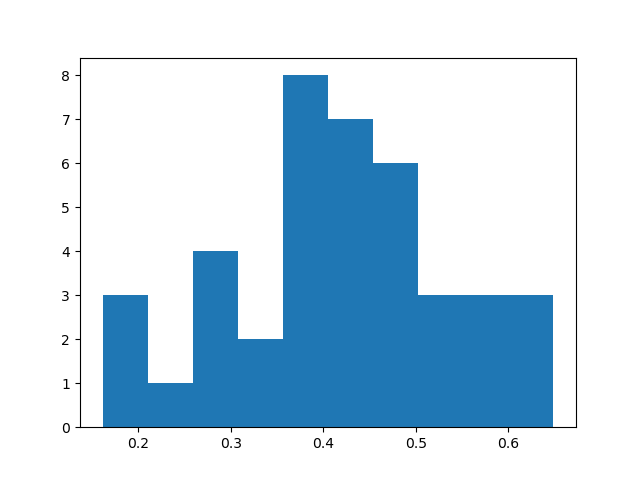

0.41536967547923015 0.11715741151400808 0.01876020001032097


40

In [6]:
df = pd.read_csv('parametersRuns-autapse.csv')
#print(df[df['lambdas'] == lambdas[8]])
alphas = df[df['lambdas'] ==  lambdas[8]]['alphaRuns'].values
print(alphas)

plt.figure()
plt.hist(alphas)

print(np.mean(alphas),np.std(alphas),stats.sem(alphas))

len(alphas)

In [7]:
lambdas[9]

0.1899999999999999

<IPython.core.display.Javascript object>


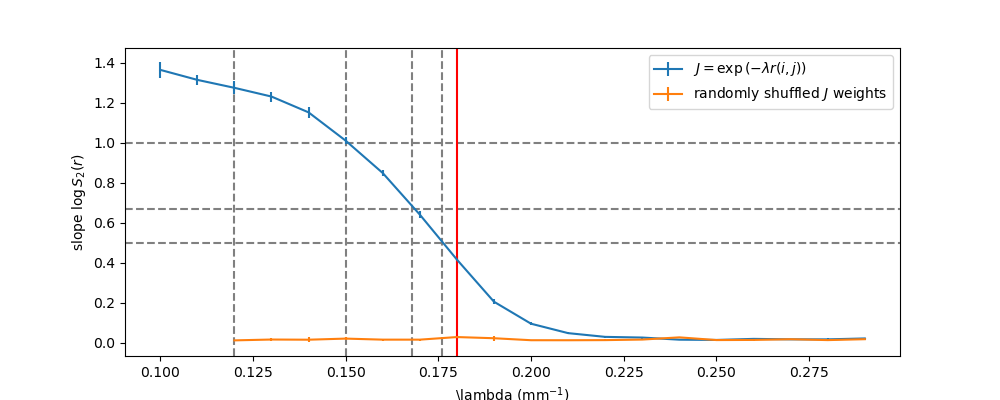

/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeW

In [8]:
f,ax=plt.subplots(1,figsize=(10,4))

df = pd.read_csv('parametersRuns-autapse.csv')
dfRand = pd.read_csv('parametersRuns-autapse-randomizeJ.csv')

lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
for lamd in lambdas:
    #print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    #print(alphas)
    n = len(alphas)
    #print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))

lambdasRand = np.unique(dfRand['lambdas'].values)

alphaMeanRand = []
alphaSeRand = []
for lamd in lambdasRand:
    #print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphasRand = dfRand[dfRand['lambdas'] == lamd]['alphaRuns'].values
    alphasRand = alphasRand[np.isfinite(alphasRand)]
    #print(alphasRand)
    n = len(alphasRand)
    #print('n',n)
    alphaMeanRand.append(np.mean(alphasRand))
    alphaSeRand.append(stats.sem(alphasRand))
    
#plt.figure()

plt.axhline(y = 1., color='gray',linestyle='--')
plt.axhline(y = 2./3., color='gray',linestyle='--')
plt.axhline(y = 1./2., color='gray',linestyle='--')

plt.axvline(x = 0.12, color='gray',linestyle='--')
plt.axvline(x = 0.15, color='gray',linestyle='--')
plt.axvline(x = 0.168, color='gray',linestyle='--')
plt.axvline(x = 0.176, color='gray',linestyle='--')

plt.errorbar(lambdas, alphaMean, alphaSe,label=r'$J=\exp{(-\lambda r(i,j))}$')
plt.errorbar(lambdasRand, alphaMeanRand, alphaSeRand, label=r'randomly shuffled $J$ weights')
plt.axvline(x = 0.18, color='r')



plt.ylabel('slope $\log S_2(r)$')
plt.xlabel('\lambda (mm$^{-1}$)')
plt.legend()
#plt.savefig('lambdaVsSlope-wShaffled2.png',dpi=600)

<IPython.core.display.Javascript object>


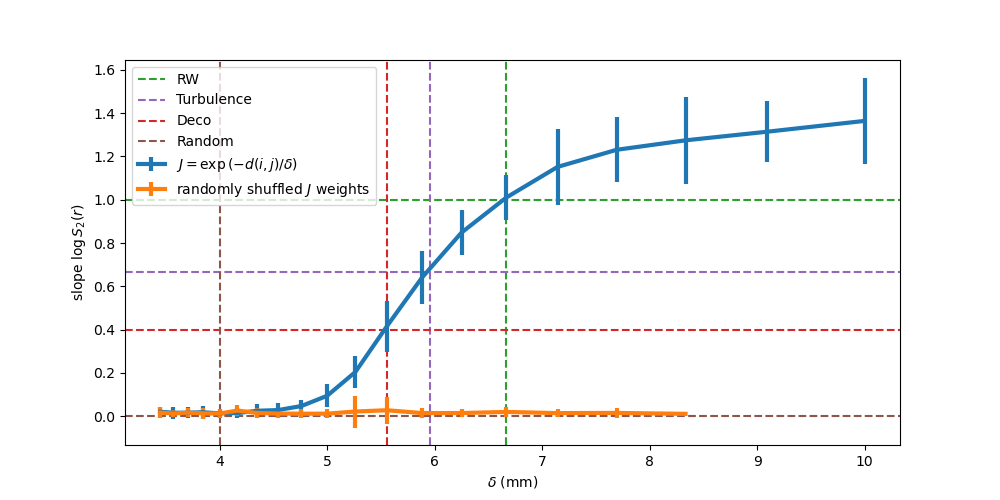

/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gosti/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeW

In [9]:
from matplotlib.cm import get_cmap

name = "tab10"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

f,ax=plt.subplots(1,figsize=(10,5))

df = pd.read_csv('parametersRuns-autapse.csv')
dfRand = pd.read_csv('parametersRuns-autapse-randomizeJ.csv')

lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
alphaStd = []
for lamd in lambdas:
    #print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    #print(alphas)
    n = len(alphas)
    #print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))
    alphaStd.append(np.std(alphas))

lambdasRand = np.unique(dfRand['lambdas'].values)

alphaMeanRand = []
alphaSeRand = []
alphaStdRand = []
for lamd in lambdasRand:
    #print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphasRand = dfRand[dfRand['lambdas'] == lamd]['alphaRuns'].values
    alphasRand = alphasRand[np.isfinite(alphasRand)]
    #print(alphasRand)
    n = len(alphasRand)
    #print('n',n)
    alphaMeanRand.append(np.mean(alphasRand))
    alphaSeRand.append(stats.sem(alphasRand))
    alphaStdRand.append(np.std(alphasRand))
    
#plt.figure()

plt.axhline(y = 1., color=colors[2],label='RW',linestyle='--')
#plt.axhline(y = 1./2., color='gray',linestyle='--')

#plt.axvline(x = 1/0.12, color='gray',linestyle='--')
plt.axvline(x = 1/0.15, color=colors[2],linestyle='--')
plt.axhline(y = 2./3., color=colors[4],label='Turbulence',linestyle='--')
plt.axvline(x = 1/0.168, color=colors[4],linestyle='--')
#plt.axvline(x = 1/0.176, color='gray',linestyle='--')

plt.axhline(y = 2./5., color=colors[3],linestyle='--',label='Deco')
plt.axvline(x = 1/0.18, color=colors[3],linestyle='--')

plt.axhline(y = 0., color=colors[5],linestyle='--',label='Random')
plt.axvline(x = 1/0.25, color=colors[5],linestyle='--')

plt.errorbar(1./lambdas, alphaMean, alphaStd,label=r'$J=\exp{(-d(i,j)/\delta)}$',color=colors[0],linewidth=3.)
plt.errorbar(1./lambdasRand, alphaMeanRand, alphaStdRand, label=r'randomly shuffled $J$ weights',color=colors[1],linewidth=3.)




plt.ylabel('slope $\log S_2(r)$')
plt.xlabel(r'$\delta$ (mm)')
plt.legend()
#plt.savefig('deltaVsSlope-wShaffled2.png',dpi=600)

<IPython.core.display.Javascript object>


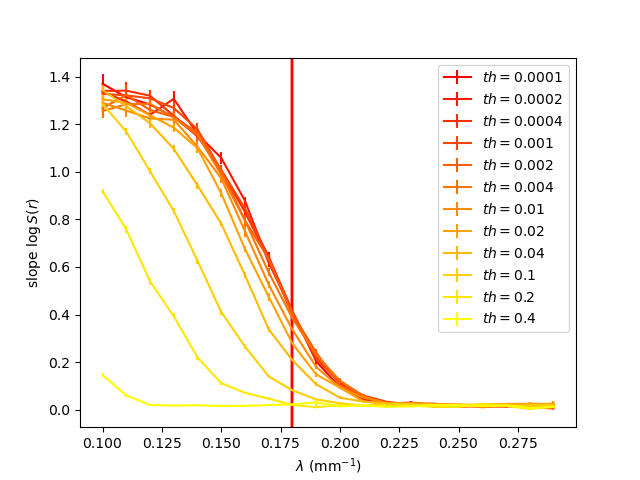

<IPython.core.display.Javascript object>


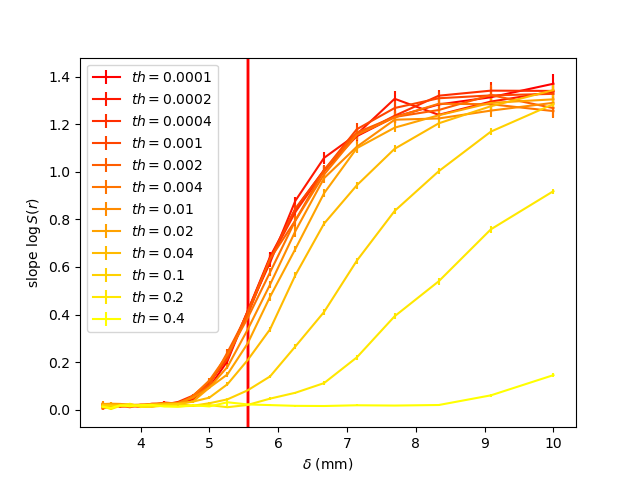

In [25]:
df = pd.read_csv('parametersRuns-autapse-thJ.csv')


ths = np.unique(df['thsRuns'].values)

f,ax0 = plt.subplots()
f,ax1 = plt.subplots()
mycols= plt.cm.autumn(np.linspace(0,1,len(ths)))

for i,th in enumerate(ths):
    #print(th)
    #print(df[df['thsRuns']==th])
    dfTh = df[df['thsRuns']==th]
    lambdas = np.unique(dfTh['lambdas'].values)
    alphaMean = []
    alphaSe = []
    for lamd in lambdas:
        #print(lamd)
        #print(df[df['lambdas'] == lamd]['alphaRuns'])
        alphas = dfTh[dfTh['lambdas'] == lamd]['alphaRuns'].values
        alphas = alphas[np.isfinite(alphas)]
        #print(alphas)
        n = len(alphas)
        #print('n',n)
        alphaMean.append(np.mean(alphas))
        alphaSe.append(stats.sem(alphas))

    ax0.errorbar(lambdas, alphaMean, alphaSe,label=r'$th=$'+str(th), color=mycols[i])
    #plt.errorbar(lambdasRand, alphaMeanRand, alphaSeRand, label=r'randomly shuffled $J$ weights')
    ax0.axvline(x = 0.18, color='r')
    ax0.set_ylabel('slope $\log S(r)$')
    ax0.set_xlabel(r'$\lambda$ (mm$^{-1}$)')
    ax0.legend()
    
    ax1.errorbar(1./lambdas, alphaMean, alphaSe,label=r'$th=$'+str(th), color=mycols[i])
    #plt.errorbar(lambdasRand, alphaMeanRand, alphaSeRand, label=r'randomly shuffled $J$ weights')
    ax1.axvline(x = 1./0.18, color='r')
    ax1.set_ylabel('slope $\log S(r)$')
    ax1.set_xlabel(r'$\delta$ (mm)')
    ax1.legend()

In [26]:
df['deltas'] = 1./df['lambdas'] 

In [34]:
df.tail(10)

,thsRuns,alphaRuns,lambdas,run,deltas,dil
9590,0.4,-0.003010,0.29,30,3.448276,0.999
9591,0.4,0.027254,0.29,31,3.448276,0.999
9592,0.4,0.047466,0.29,32,3.448276,0.999
9593,0.4,0.014932,0.29,33,3.448276,0.999
9594,0.4,0.003340,0.29,34,3.448276,0.999
9595,0.4,0.031312,0.29,35,3.448276,0.999
9596,0.4,0.017149,0.29,36,3.448276,0.999
9597,0.4,0.017862,0.29,37,3.448276,0.999
9598,0.4,0.001651,0.29,38,3.448276,0.999
9599,0.4,-0.002019,0.29,39,3.448276,0.999


In [28]:
ths = df['lambdas'].values
print(ths)

[0.1  0.1  0.1  ... 0.29 0.29 0.29]


In [36]:
import turboBrainUtils as tb 
from scipy.spatial import distance

df = pd.read_csv('parametersRuns-autapse-thJ.csv')

# # Parcellizzazione
# https://www.sciencedirect.com/science/article/pii/S2211124720314601?via%3Dihub
df0 = pd.read_csv('Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
df0.head()
X = df0['R']
Y = df0['A']
Z = df0['S']
N=len(X)

coords = np.array([X,Y,Z]).T
dist = distance.cdist(coords, coords, 'euclidean')

lambdas = df['lambdas'].values
ths = df['thsRuns'].values
dils = []

for thJ, lambd in zip(lambdas,ths):
    print('Lambda',lambd,'thJ',thJ)
    J = tb.makeJ(dist,lambd,autapse=True,randomize=False)
    #print(J[:4,:4], (J<thJ)[:4,:4], 'num cut',np.sum(J<thJ), thJ)
    J[J<thJ] = 0.
    dil = np.sum(np.sum(J==0)/(N*N))
    dils.append(dil)
df['dil'] = dils

Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.1
Lambda 0.0001 thJ 0.11
Lambda 0.0001 thJ 0.11
Lambda 0.0001 thJ 0.11
Lambda 0.0001 thJ 0.11
Lambda 0.0001 thJ 0.11
Lambd

Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
Lambda 0.0001 thJ 0.1699999999999999
L

Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2199999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
Lambda 0.0001 thJ 0.2299999999999999
L

Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2799999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
Lambda 0.0001 thJ 0.2899999999999999
L

Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
Lambda 0.0002 thJ 0.1599999999999999
L

Lambda 0.0002 thJ 0.2099999999999999
Lambda 0.0002 thJ 0.2099999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
Lambda 0.0002 thJ 0.2199999999999999
L

Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2699999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
Lambda 0.0002 thJ 0.2799999999999999
L

Lambda 0.0004 thJ 0.1399999999999999
Lambda 0.0004 thJ 0.1399999999999999
Lambda 0.0004 thJ 0.1399999999999999
Lambda 0.0004 thJ 0.1399999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
Lambda 0.0004 thJ 0.1499999999999999
L

Lambda 0.0004 thJ 0.1999999999999999
Lambda 0.0004 thJ 0.1999999999999999
Lambda 0.0004 thJ 0.1999999999999999
Lambda 0.0004 thJ 0.1999999999999999
Lambda 0.0004 thJ 0.1999999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
Lambda 0.0004 thJ 0.2099999999999999
L

Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2599999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
Lambda 0.0004 thJ 0.2699999999999999
L

Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1399999999999999
Lambda 0.001 thJ 0.1499999999999999
Lambda 0.001 thJ 0.1499999999999999
Lambda 0.001 thJ 0.149999999

Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.1999999999999999
Lambda 0.001 thJ 0.199999999

Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.2599999999999999
Lambda 0.001 thJ 0.259999999

Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.13
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda 0.002 thJ 0.1399999999999999
Lambda

Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1899999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.1999999999999999
Lambda 0.002 thJ 0.199999999

Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2499999999999999
Lambda 0.002 thJ 0.2599999999999999
Lambda 0.002 thJ 0.2599999999999999
Lambda 0.002 thJ 0.2599999999999999
Lambda 0.002 thJ 0.2599999999999999
Lambda 0.002 thJ 0.2599999999999999
Lambda 0.002 thJ 0.259999999

Lambda 0.004 thJ 0.11
Lambda 0.004 thJ 0.11
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.12
Lambda 0.004 thJ 0.13
Lambda 0.004 thJ 0.13
Lambda 0.004 thJ 0.13
Lambda 0.0

Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1799999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.1899999999999999
Lambda 0.004 thJ 0.189999999

Lambda 0.004 thJ 0.2399999999999999
Lambda 0.004 thJ 0.2399999999999999
Lambda 0.004 thJ 0.2399999999999999
Lambda 0.004 thJ 0.2399999999999999
Lambda 0.004 thJ 0.2399999999999999
Lambda 0.004 thJ 0.2399999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.2499999999999999
Lambda 0.004 thJ 0.249999999

Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.11
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 thJ 0.12
Lambda 0.01 t

Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1799999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.1899999999999999
Lambda 0.01 thJ 0.18

Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2399999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.2499999999999999
Lambda 0.01 thJ 0.24

Lambda 0.02 thJ 0.1
Lambda 0.02 thJ 0.1
Lambda 0.02 thJ 0.1
Lambda 0.02 thJ 0.1
Lambda 0.02 thJ 0.1
Lambda 0.02 thJ 0.1
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.11
Lambda 0.02 thJ 0.12
Lambda 0.02 thJ 0.1

Lambda 0.02 thJ 0.1699999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.1799999999999999
Lambda 0.02 thJ 0.17

Lambda 0.02 thJ 0.2299999999999999
Lambda 0.02 thJ 0.2299999999999999
Lambda 0.02 thJ 0.2299999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.2399999999999999
Lambda 0.02 thJ 0.23

Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.1
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04 thJ 0.11
Lambda 0.04

Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1699999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.1799999999999999
Lambda 0.04 thJ 0.17

Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2299999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.2399999999999999
Lambda 0.04 thJ 0.23

Lambda 0.04 thJ 0.2899999999999999
Lambda 0.04 thJ 0.2899999999999999
Lambda 0.04 thJ 0.2899999999999999
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.1
Lambda 0.1 thJ 0.11
Lambda 0.1 thJ 0.11
Lambda 0.1 thJ 0.11
Lambda 0.1 thJ 0.11
Lambda 0.1 thJ 0.11
Lambda 0.1 thJ 0.11
Lambda 0.1 thJ 

Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1699999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ 0.1799999999999999
Lambda 0.1 thJ

Lambda 0.1 thJ 0.2299999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ 0.2399999999999999
Lambda 0.1 thJ

Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.1
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda 0.2 thJ 0.11
Lambda

Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ 0.1799999999999999
Lambda 0.2 thJ

Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2399999999999999
Lambda 0.2 thJ 0.2499999999999999
Lambda 0.2 thJ 0.2499999999999999
Lambda 0.2 thJ 0.2499999999999999
Lambda 0.2 thJ 0.2499999999999999
Lambda 0.2 thJ 0.2499999999999999
Lambda 0.2 thJ 0.2499999999999999
Lambda 0.2 thJ

Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.11
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12
Lambda 0.4 thJ 0.12


Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1799999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ 0.1899999999999999
Lambda 0.4 thJ

Lambda 0.4 thJ 0.2399999999999999
Lambda 0.4 thJ 0.2399999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ 0.2499999999999999
Lambda 0.4 thJ

In [42]:
df.tail(10)

,thsRuns,alphaRuns,lambdas,run,deltas,dil
9590,0.4,-0.003010,0.29,30,3.448276,0.999
9591,0.4,0.027254,0.29,31,3.448276,0.999
9592,0.4,0.047466,0.29,32,3.448276,0.999
9593,0.4,0.014932,0.29,33,3.448276,0.999
9594,0.4,0.003340,0.29,34,3.448276,0.999
9595,0.4,0.031312,0.29,35,3.448276,0.999
9596,0.4,0.017149,0.29,36,3.448276,0.999
9597,0.4,0.017862,0.29,37,3.448276,0.999
9598,0.4,0.001651,0.29,38,3.448276,0.999
9599,0.4,-0.002019,0.29,39,3.448276,0.999


<IPython.core.display.Javascript object>


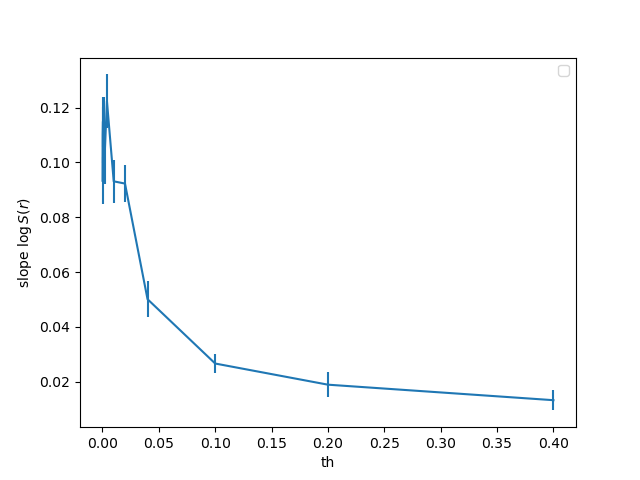

<IPython.core.display.Javascript object>


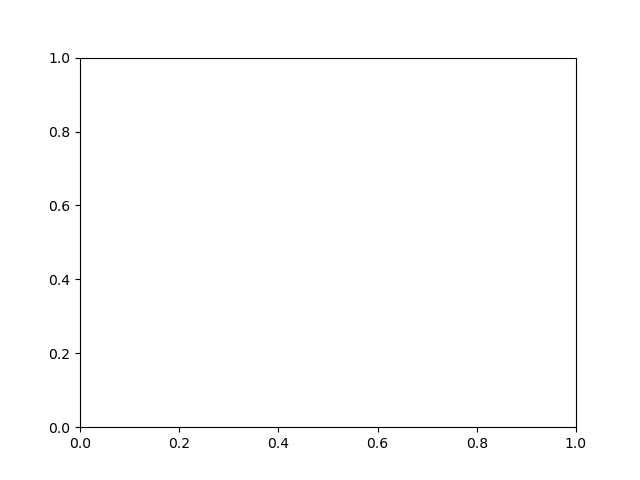

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

3.4482758620689666
3.5714285714285725
3.703703703703705
3.8461538461538476
4.000000000000002
4.166666666666668
4.347826086956523
4.545454545454548
4.761904761904764
5.000000000000003
      thsRuns  alphaRuns  lambdas  run  deltas    dil
400    0.0001   0.076070      0.2    0     5.0  0.000
401    0.0001   0.098442      0.2    1     5.0  0.000
402    0.0001   0.120560      0.2    2     5.0  0.000
403    0.0001   0.122444      0.2    3     5.0  0.000
404    0.0001   0.015745      0.2    4     5.0  0.000
...       ...        ...      ...  ...     ...    ...
9235   0.4000   0.001513      0.2   35     5.0  0.999
9236   0.4000  -0.010142      0.2   36     5.0  0.999
9237   0.4000   0.007962      0.2   37     5.0  0.999
9238   0.4000   0.035402      0.2   38     5.0  0.999
9239   0.4000   0.000554      0.2   39     5.0  0.999

[480 rows x 6 columns]
12 7
12
12


ValueError: 'x' and 'y' must have the same size

In [44]:
#df = pd.read_csv('parametersRuns-autapse-thJ.csv')
#df['deltas'] = 1./df['lambdas'] 

deltas = np.unique(df['deltas'].values)
#ths = np.unique(df['thsRuns'].values)

f,ax0 = plt.subplots()
f,ax1 = plt.subplots()
mycols= plt.cm.autumn(np.linspace(0,1,len(ths)))

for i,delta in enumerate(deltas):
    print(delta)
    #print(df[df['thsRuns']==th])
    if (delta > 5.) and (delta < 7.): 
        dfdlt = df[df['deltas']==delta]
        plt.figure()
        plt.sc
        print(dfdlt)
        ths = np.unique(dfdlt['thsRuns'].values)
        dils = np.unique(dfdlt['dil'].values)
        #print(ths)
        print(ths.size,dils.size)
        alphaMean = []
        alphaSe = []
        for th in ths:
            #print(lamd)
            #print(df[df['lambdas'] == lamd]['alphaRuns'])
            alphas = dfdlt[dfdlt['thsRuns'] == th]['alphaRuns'].values
            alphas = alphas[np.isfinite(alphas)]
            #print(alphas)
            n = len(alphas)
            #print('n',n)
            alphaMean.append(np.mean(alphas))
            alphaSe.append(stats.sem(alphas))
        print(len(alphaMean))
        print(len(alphaSe))
        ax0.errorbar(ths, alphaMean, alphaSe,label=r'$\delta=$'+str(np.round(1./lmb,1))+'(mm)')#, color=mycols[i])
        ax1.errorbar(dils,alphaMean, alphaSe)
    #ax0.errorbar(lambdasRand, alphaMeanRand, alphaSeRand, label=r'randomly shuffled $J$ weights')
    #ax0.axvline(x = 0.18, color='r')
    ax0.set_ylabel('slope $\log S(r)$')
    ax0.set_xlabel(r'th')
    ax0.legend()

In [40]:
lambdas = np.unique(df['lambdas'].values)

In [41]:
delta = 0.5
dfdlt = df[df['deltas']==np.unique(df['deltas'])[9]]
ths = np.unique(dfdlt['thsRuns'].values)
ths

array([1.e-04, 2.e-04, 4.e-04, 1.e-03, 2.e-03, 4.e-03, 1.e-02, 2.e-02,
       4.e-02, 1.e-01, 2.e-01, 4.e-01])

In [80]:
 dils = np.unique(dfLmb['dil'].values)

5.000000000000003